# Color Identification in Images
In this code Kmeans algorithm along with OpenCV is used to identify the colours in an image.

### Import Libraries
Initially, basic libraries are imported.

In [1]:
from sklearn.cluster import KMeans                #KMeans algorithm is part of the sklearn's cluster subpackage.
import matplotlib.pyplot as plt                   
import numpy as np                                
import cv2                                        
from collections import Counter                   #To extract the count, Counter from the collections library is used.
from skimage.color import rgb2lab, deltaE_cie76   #To compare colors we first convert them to lab using rgb2lab and then 
                                                  #calculate similarity using deltaE_cie76.
import os                                         #To combine paths while reading files from a directory, we import os.

%matplotlib inline

### Working with OpenCV
Basic operations in OpenCV are understood.

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


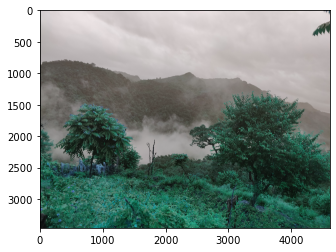

In [2]:
image = cv2.imread('image_1.jpg')                          #image is read in OpenCV
print("The type of this input is {}".format(type(image)))  #type of image is checked
print("Shape: {}".format(image.shape))                     #size of image is checked
plt.imshow(image)                                          #image is displayed

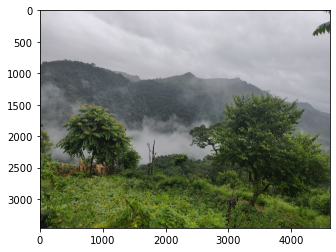

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #the image is converted from BGR to RGB to get the original image
plt.imshow(image)                              #image is displayed

###### 
We see a difference in the above images where the second image is the original image. This difference in colour is because in 
OpenCV images are read in BGR (blue, green, red) format by default. Hence to obtain the original image we need to convert it to
RGB (red, green, blue). 

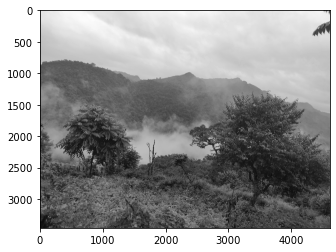

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #image is converted from BGR to Grayscale 
plt.imshow(gray_image, cmap='gray')                  #grayscale image is displayed

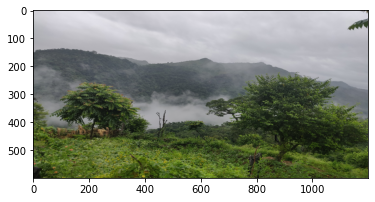

In [5]:
resized_image = cv2.resize(image, (1200, 600))  #image is resized according to the user's requirement
plt.imshow(resized_image)                       #resized image is displayed

###### 
Here the image can be converted to grayscale if and when needed and can be resized to fit it to the user's need. 

# Colour Identification
Now, let's create an algorithm to identify colours in our image

First, we define a function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [6]:
def RGB2HEX(color):                          #function which converts RGB to Hex is created
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

###### 
Next, we define a method that will help us get an image into Python in the RGB space.

In [7]:
def get_image(image_path):                                #another function to get an image into RGB space is created
    image = cv2.imread(image_path)                        #image path is read
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        #image is converted from BGR to RGB
    return image                                          #function has a return value = image

###### 
We supply the path of the image as the argument . First, we read the file using imread and then change its color space 
before returning it.

In [8]:
def get_colors(image, number_of_colors, show_chart):               #function to get the colours from the image is created
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)              #image is resized to lessen the 
                                                                                                #pixels which will reduce the 
                                                                                                #time of extraction of colours 
                                                                                                #from the image.
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3) #resized image is reshaped as 
                                                                                                #KMeans expects the input to be 
                                                                                                #of 2 dimensions
    
    clf = KMeans(n_clusters = number_of_colors)    #KMeans will form clusters and these clusters will be our top colors.
    labels = clf.fit_predict(modified_image)       #Then we fit and predict on the same image to extract the prediction 
                                                   #into the variable labels.
    
    counts = Counter(labels)                       #Then Counter is used to get count of all labels.
    # sort to ensure correct color percentage 
    counts = dict(sorted(counts.items()))          
                                                   
    center_colors = clf.cluster_centers_           #To find the colors, we use clf.cluster_centers_.
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    #Next we get the hex and rgb colors.
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):                      #To plot the pie chart
        plt.figure(figsize = (8, 6))
        #pie chart portion is defined using count.values(), labels as hex_colors and colors as ordered_colors.
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors    #finally return the rgb_colors which we’ll use at a later stage.

[array([54.47451789, 67.26874724, 34.01734138]),
 array([179.40228763, 179.99089283, 186.39437307]),
 array([120.36759076, 124.97698877, 124.80505658]),
 array([109.91326531, 125.41597   ,  56.68834522]),
 array([206.54114052, 206.24043949, 213.72127354]),
 array([83.60277693, 90.49716536, 91.6814679 ]),
 array([30.1206201 , 38.53466567, 21.12005977]),
 array([78.4897952 , 96.2556664 , 38.36603335])]

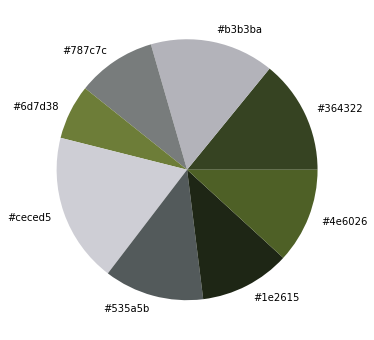

In [9]:
get_colors(get_image('image_1.jpg'), 8, True)     #Call the function to get the pie chart

### Search images using Colour
We can search images based on colours.

In [10]:
IMAGE_DIRECTORY = 'images'        #store all the images in a variable 'images'
COLORS = {                        #We define COLORS as a dictionary of colors.   
    'GREEN': [0, 128, 0],              
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []                       #We read all images in the folder and save their values in the images array. 

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

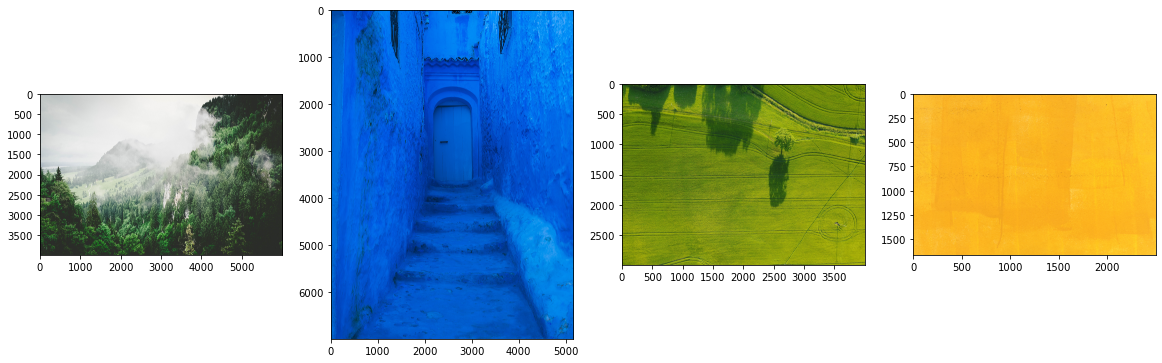

In [11]:
plt.figure(figsize=(20, 10))     
for i in range(len(images)):         #we see all the images in the folder by applying a for loop
    plt.subplot(1, len(images), i+1) #plot all the images in the same plot
    plt.imshow(images[i])            #display all the images in the folder

### Match Images with Colour
We now define a method to filter all images that match the selected color. We first extract the image colors using our previously defined method get_colors in RGB format. We use the method rgb2lab to convert the selected color to a format we can compare. 
The for loop simply iterates over all the colors retrieved from the image. For each color, the loop changes it to lab, finds the delta (basically difference) between the selected color and the color in iteration and if the delta is less than the threshold, the image is selected as matching with the color. 
We need to calculate the delta and compare it to the threshold because for each color there are many shades and we cannot always exactly match the selected color with the colors in the image.
If we extract say 5 colors from an image, even if one color matches with the selected color, we select that image. The threshold basically defines how different can the colors of the image and selected color be.

In [12]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): #function to match image by colour
    
    image_colors = get_colors(image, number_of_colors, False)                  #we first get the image colours
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))                  #then colours are converted from rgb to lab

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))        #current colours of image is stored in an array
        diff = deltaE_cie76(selected_color, curr_color)                        #similarity between selected colour and image 
                                                                               #colours are calculated
        if (diff < threshold):                                                 #difference in colour is compared to the set 
            select_image = True                                                #threshold
    
    return select_image                                                        #selected image is returned

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):           #function to display selected image
    index = 1
    
    for i in range(len(images)):                                               #for loop to display images with a colour
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):                                                         #displaying the images with the selected colour
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

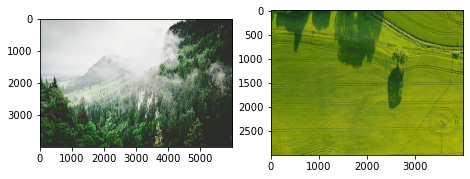

In [14]:
# Search for GREEN
plt.figure(figsize = (20, 10))                                                 #display images containing the colour green
show_selected_images(images, COLORS['GREEN'], 60, 5)

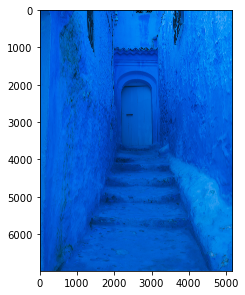

In [15]:
# Search for BLUE
plt.figure(figsize = (20, 10))                                                #display images containing the colour blue
show_selected_images(images, COLORS['BLUE'], 60, 5)

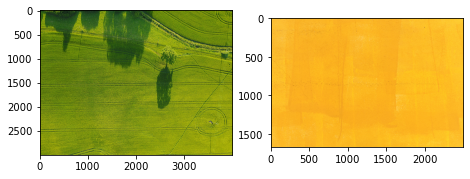

In [16]:
# Search for YELLOW
plt.figure(figsize = (20, 10))                                               #display images containing the colour yellow
show_selected_images(images, COLORS['YELLOW'], 60, 5)